<a href="https://colab.research.google.com/github/BNik2001/foo/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/google-drive-google-colab-github-dont-just-read-do-it-5554d5824228

https://cyberguru.tech/программирование/машинное-обучение/линейная-регрессия-в-python -- супер пупер статья про все это, объясняется супер 

In [2]:
!git clone https://github.com/BNik2001/foo.git

fatal: destination path 'foo' already exists and is not an empty directory.


In [3]:
%cd foo
!ls

/content/foo
'car data.csv'		    insurance.csv   README.md	       Regression.ipynb
 employee_survey_data.csv   prices.csv	   'Real estate.csv'


In [66]:
from pandas import read_csv, DataFrame



In [127]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("car data.csv")
dataset_1 =pd.read_csv("Real estate.csv")
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Взял для примера у себя 

In [75]:
dataset_1.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


# Уже для моей рабочей даты

https://habr.com/ru/post/206306/ -- идея отседова о corr()

In [68]:
dataset.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


 Нужно среди столбцов выбрать потенциальные факторы, индикатор - Selling_Price

3) Удалить один из пар линейнозависимых признаков. Если их попраная корреляция очень большая (|r|>0.8, тоже порог можно поднять) - ничего не удаляем, как другие,как кроме Selling_Price и Present_Price ничто не имеет большую поправную корреляцию :)

In [60]:
print(dataset.describe())

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [49]:
dataset.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Owner            0
dtype: int64

In [62]:
Y = np.array(dataset["Selling_Price"])
X1 = np.array(dataset["Year"])
X2 = np.array(dataset["Present_Price"])
X3 = np.array(dataset["Kms_Driven"])
X4 = np.array(dataset["Owner"])

r1 = np.corrcoef(X1, Y)
print("r1 = ", r1[0][1])
r2 = np.corrcoef(X2, Y)
print("r2 = ", r2[0][1])
r3 = np.corrcoef(X3, Y)
print("r3 = ", r3[0][1])
r4 = np.corrcoef(X4, Y)
print("r4 = ", r4[0][1])



r1 =  0.23614098016042756
r2 =  0.878982545161496
r3 =  0.029187090674291354
r4 =  -0.0883440990872019


Ничего не удаляем, как |r|<0.001 везде больше 

http://statsoft.ru/home/textbook/modules/stmulreg.html

https://www.machinelearningmastery.ru/simple-and-multiple-linear-regression-in-python-c928425168f9/

In [106]:
import statsmodels.api as sm # import statsmodels 

X = dataset[["Present_Price", "Kms_Driven", "Owner"]] ## X usually means our input variables (or independent variables)
y = dataset["Selling_Price"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     402.9
Date:                Sun, 21 Mar 2021   Prob (F-statistic):          2.50e-104
Time:                        23:46:59   Log-Likelihood:                -671.67
No. Observations:                 301   AIC:                             1351.
Df Residuals:                     297   BIC:                             1366.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3711      0.203      6.751      0.000       0.971       1.771
Present_Price     0.5351      0.015     34.568      0.000       0.505       0.566
Kms_Driven    -1.945e-05   3.45e-06     -5.629      0.000   -2.62e-05   -1.26e-05
Owner            -1.6894      0.530     -3.185      0.002      -2.733      -0.645
==============================================================================
Omnibus:                       65.364   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1191.924
Skew:                           0.161   Prob(JB):                    1.50e-259
Kurtosis:                      12.743   Cond. No.                     2.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Во и теперь все соотвествует логике и здравому смыслу, большее влиянее имеет прошлая цена, которая была в прошлом у владельца автомобиля, логично же, как и логично, что чем больше расстояние пройдет машина(пробег, но самое главное, что сильную зависимость оно не показало, что значит, что тут не точна) и поменяет владельцев, то у нее цена машины будет снижаться, а корреляция показывает, что колличество смененных владельцев сильно негативно влияет на цену

также можем заметить, что R^2 довольно большой, что для нас дополнительная надежда верить, что прогноз достоверный и я не накосячил)

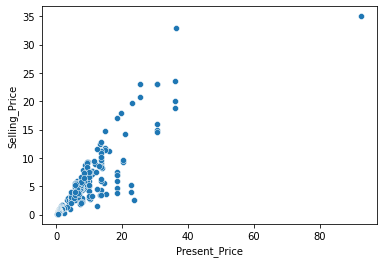

In [64]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
sns.scatterplot(x='Present_Price',y='Selling_Price',data=dataset)

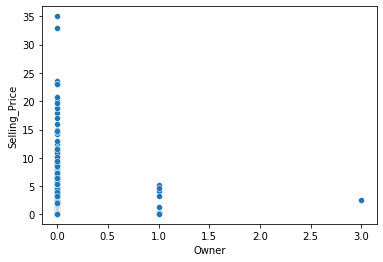

In [91]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
sns.scatterplot(x='Owner',y='Selling_Price',data=dataset)

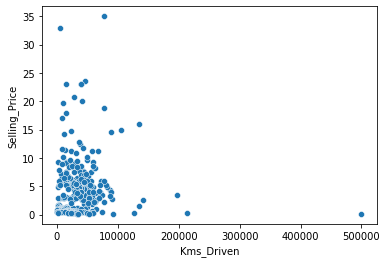

In [107]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
sns.scatterplot(x='Kms_Driven',y='Selling_Price',data=dataset)

# пробуем с sklearn

In [139]:
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [129]:
dataset_X = dataset.drop(['Car_Name',	'Year',"Selling_Price", 'Fuel_Type'	,'Seller_Type',	'Transmission'	], axis=1)
dataset_X .head()

,Present_Price,Kms_Driven,Owner
0,5.59,27000,0
1,9.54,43000,0
2,9.85,6900,0
3,4.15,5200,0
4,6.87,42450,0


In [133]:
dataset_Y = dataset["Selling_Price"]
dataset_Y .head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [156]:
model = LinearRegression().fit(dataset_X, dataset_Y)

In [161]:
print('coefficient of determination:', model.score(dataset_X, dataset_Y))
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8027614536043668
intercept: 1.3710627496807182
slope: [ 5.35053857e-01 -1.94451566e-05 -1.68944584e+00]


ну собственно тоже самое, только под другой начинкой, Slope это ттеже самые коэффиценты корреляции по каждому из признаков, которые были в dataset_X